In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [3]:
cd = pd.read_csv("D://assignments//assignment 5//50_Startups.csv")

print(cd.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
cd.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
cd = cd.rename(columns = {'R&D Spend': 'RD', 'Administration': 'Admin','Marketing Spend': 'MS'}, inplace = False)

In [7]:
cd.corr()

,RD,Admin,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


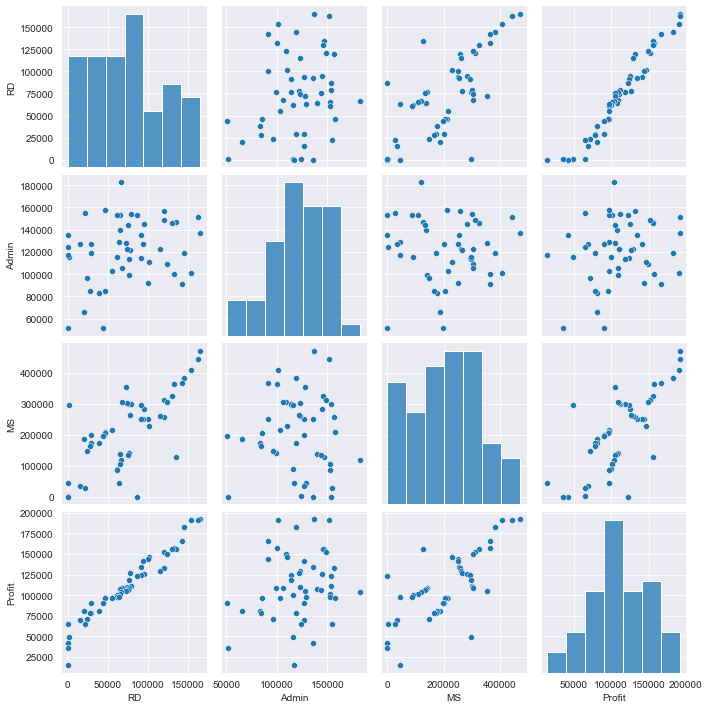

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(cd)

In [9]:
cd_cle1=cd

In [10]:
cd_cle1[cd_cle1.duplicated()].shape

(0, 5)

In [11]:
cd_cle1


,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<AxesSubplot:>

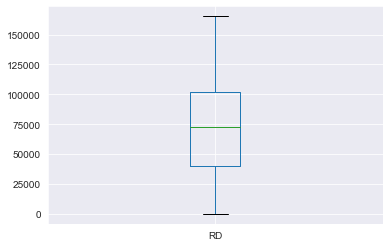

In [12]:
cd_cle1.boxplot(column=['RD'])

<AxesSubplot:>

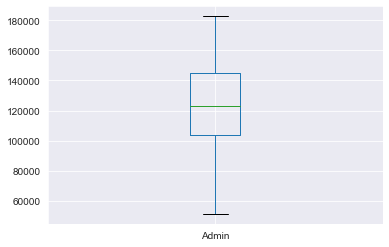

In [13]:
cd_cle1.boxplot(column=['Admin'])

<AxesSubplot:>

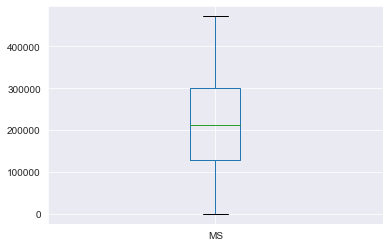

In [14]:
cd_cle1.boxplot(column=['MS'])

<AxesSubplot:>

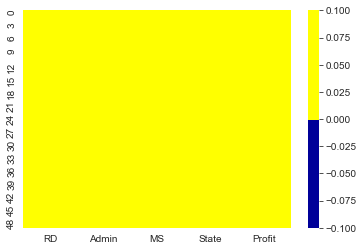

In [15]:
cols = cd_cle1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(cd_cle1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [16]:
cd_cle1[cd_cle1.isnull().any(axis=1)].head()

,RD,Admin,MS,State,Profit


In [17]:
cd_cle1.isnull().sum()

RD        0
Admin     0
MS        0
State     0
Profit    0
dtype: int64

In [18]:
obj_columns=cd_cle1[['State']]

In [19]:
obj_columns.isnull().sum()

State    0
dtype: int64

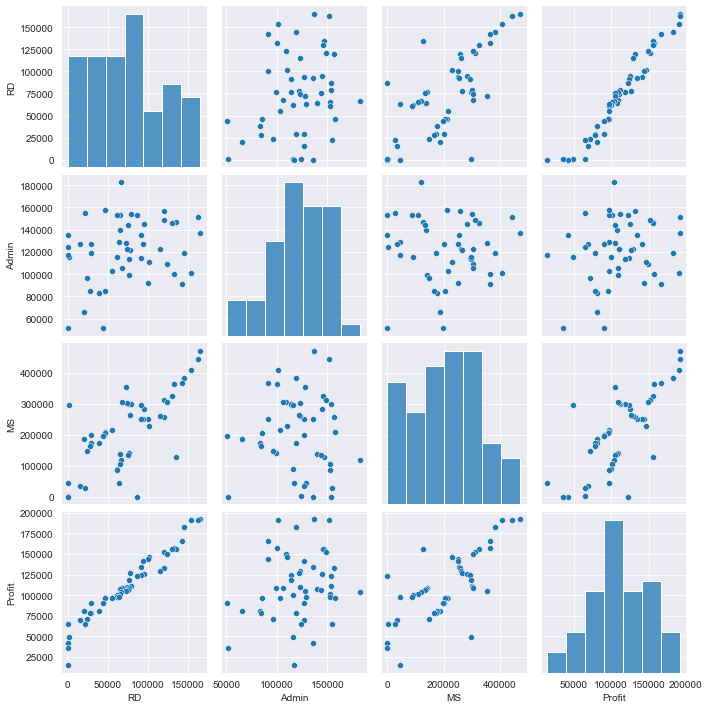

In [20]:
sns.pairplot(cd_cle1)

In [21]:
cd_cle1.corr()

,RD,Admin,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [22]:
cd_cle2=pd.get_dummies(cd_cle1,columns=['State'])

In [23]:
cd_cle2

,RD,Admin,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [24]:
cd_cle2=cd_cle2.dropna()

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
array = cd_cle2.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)


np.set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 2.02  0.56  2.15  2.01 -0.72 -0.69  1.39]
 [ 1.96  1.08  1.92  2.    1.39 -0.69 -0.72]
 [ 1.75 -0.73  1.63  1.98 -0.72  1.46 -0.72]
 [ 1.55 -0.1   1.42  1.78 -0.72 -0.69  1.39]
 [ 1.5  -1.08  1.28  1.36 -0.72  1.46 -0.72]]


In [28]:
model = smf.ols('Profit~ RD + MS+ Admin',data=cd_cle2).fit()

In [29]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        14:30:22   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
ml_m=smf.ols('Profit~MS',data = cd_cle2).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [31]:
ml_a=smf.ols('Profit~Admin',data = cd_cle2).fit()  
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [32]:
ml_ma=smf.ols('Profit~Admin+MS',data = cd_cle2).fit()  
print(ml_ma.tvalues, '\n', ml_ma.pvalues)  

Intercept    1.142741
Admin        2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
Admin        1.729198e-02
MS           9.727245e-11
dtype: float64


In [33]:
rsq_ms = smf.ols('MS~RD+Admin',data=cd_cle2).fit().rsquared  
vif_ms = 1/(1-rsq_ms)

rsq_admin = smf.ols('Admin~RD+MS',data=cd_cle2).fit().rsquared  
vif_admin = 1/(1-rsq_admin) 

rsq_rd = smf.ols('RD~MS+Admin',data=cd_cle2).fit().rsquared  
vif_rd = 1/(1-rsq_rd) 

d1 = {'Variables':['MS','Admin','RD'],'VIF':[vif_ms,vif_rd,vif_admin]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,MS,2.326773
1,Admin,2.468903
2,RD,1.175091


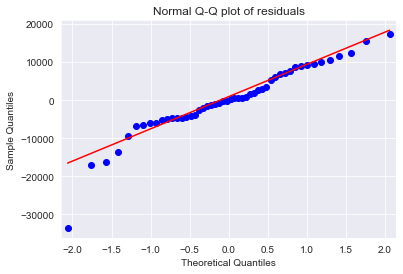

In [34]:
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [36]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

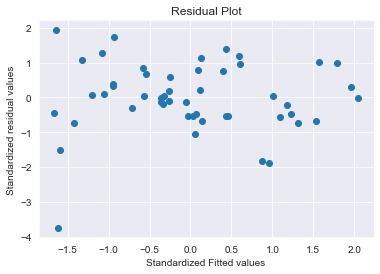

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

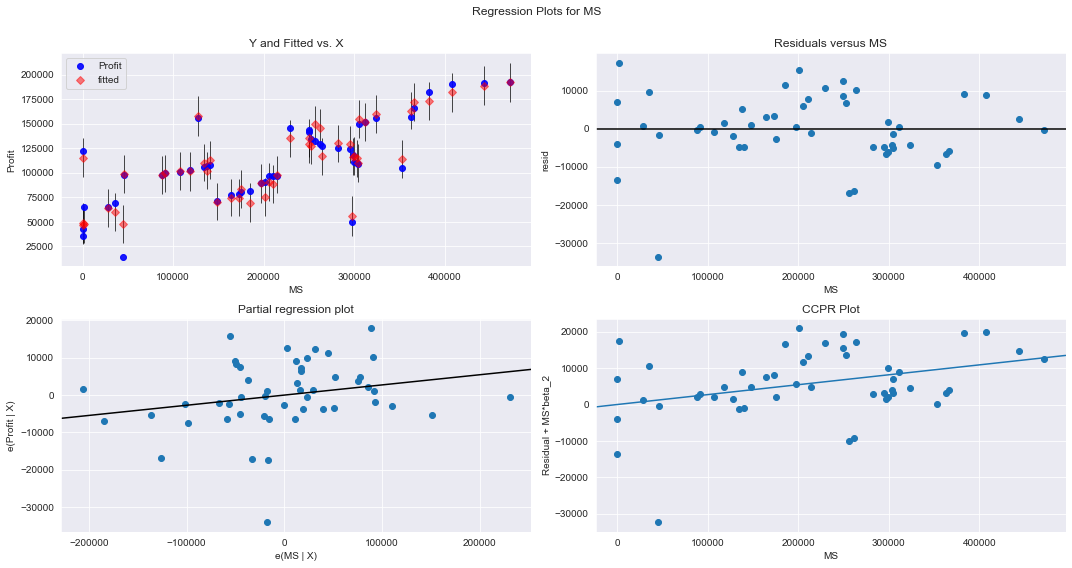

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

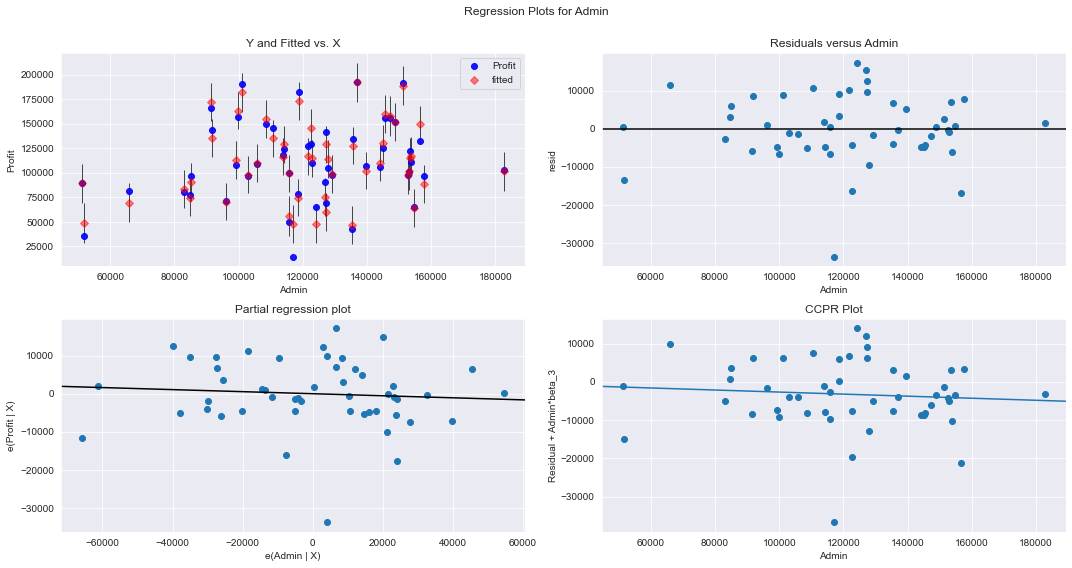

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

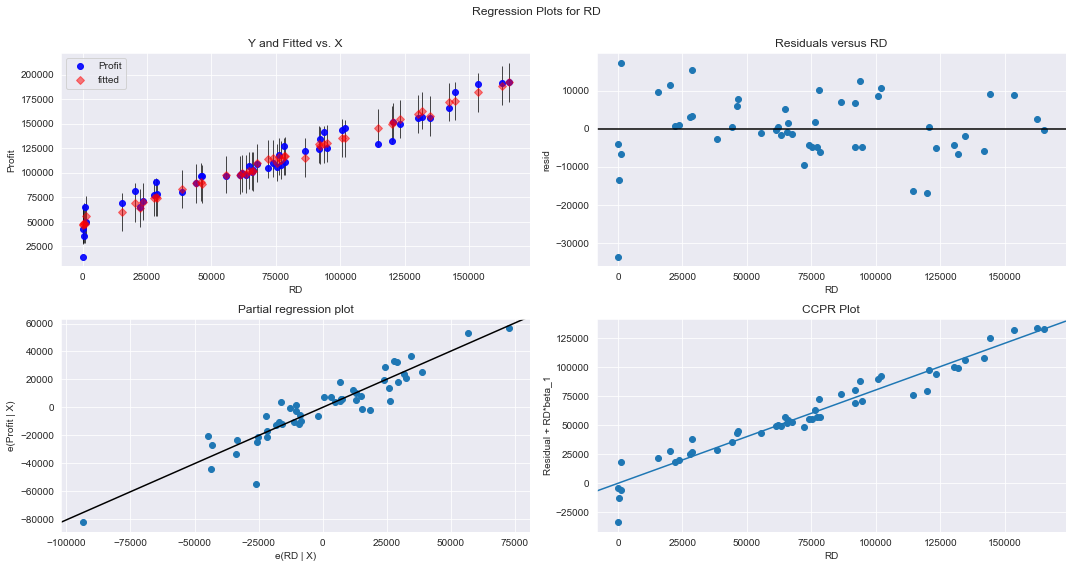

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

In [41]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

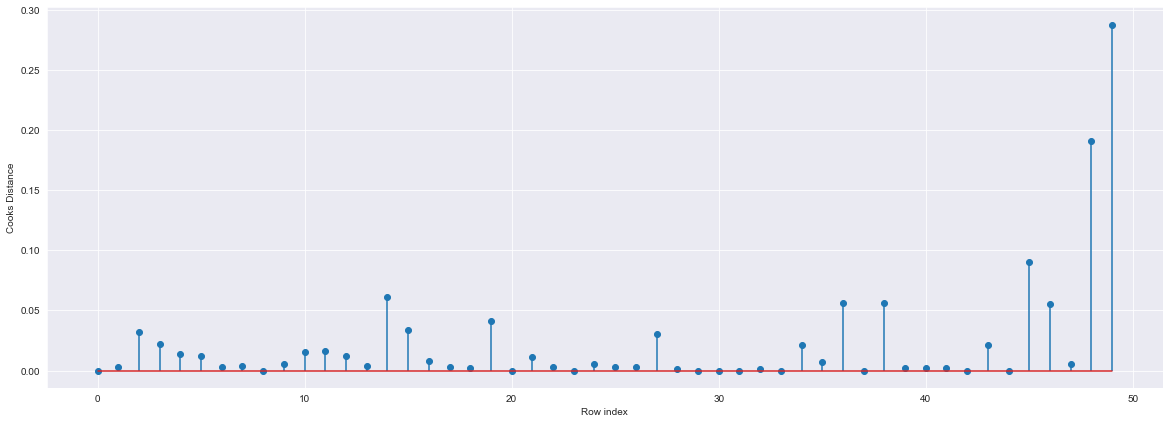

In [42]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cd_cle1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543277)

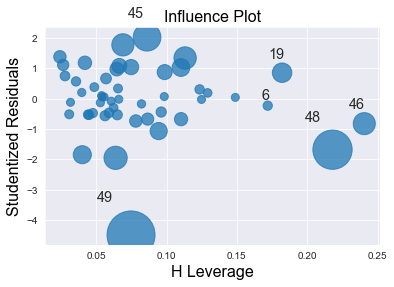

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [45]:
k = cd_cle1.shape[1]
n = cd_cle1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [46]:
cd_cle1[cd_cle1.index.isin([48, 49])]

,RD,Admin,MS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [47]:
cd_cle1.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
cd_new=pd.read_csv("D://assignments//assignment 5//50_Startups.csv")

In [49]:
cd_new1=cd_new.drop(cd_new.index[[48,49]],axis=0).reset_index()

In [50]:
cd_new1=cd_new1.drop(['index'],axis=1)

In [51]:
cd_new1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [52]:
cd_new1 = cd_new1.rename(columns = {'R&D Spend': 'RD', 'Administration': 'Admin','Marketing Spend': 'MS'}, inplace = False)

In [53]:
final_ml_ms= smf.ols('Profit~MS+RD',data = cd_new1).fit()

In [54]:
(final_ml_ms.rsquared,final_ml_ms.aic)

(0.9609119875752479, 994.886442942941)

In [55]:
final_ml_ad= smf.ols('Profit~Admin+RD',data = cd_new1).fit()

In [56]:
(final_ml_ad.rsquared,final_ml_ad.aic)

(0.9613542664192156, 994.3402293693792)

Comparing above R-Square and AIC values, model 'final_ml_ad' has high R- square and low AIC value hence include variable 'Admin' so that multi collinearity problem would be resolved.

In [57]:
model_influence_ad = final_ml_ms.get_influence()
(c_ad, _) = model_influence_ad.cooks_distance

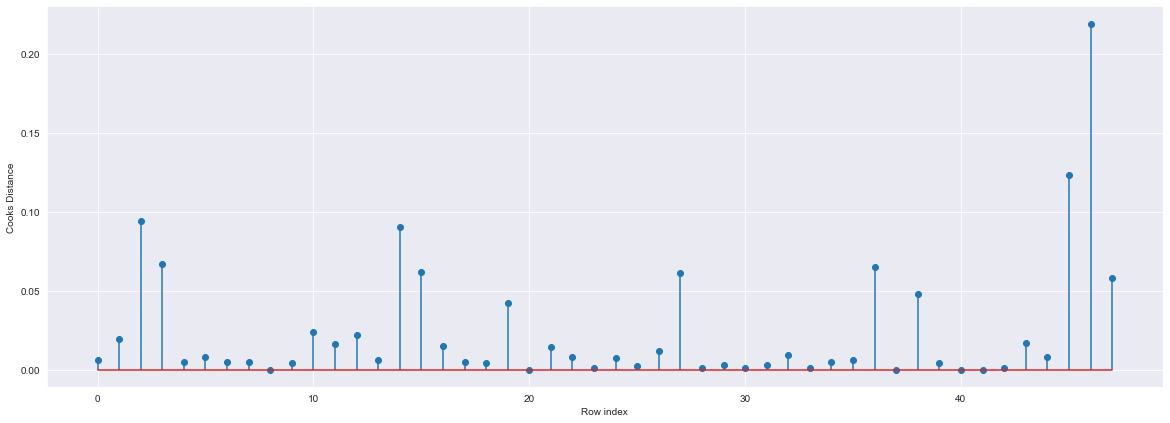

In [58]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cd_new1)),np.round(c_ad,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [59]:
(np.argmax(c_ad),np.max(c_ad))

(46, 0.21870175123751606)

In [60]:
cd_new2=cd_new1.drop(cd_new1.index[[45,46]],axis=0)

In [61]:
cd_new2

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [62]:
cd_new3=cd_new2.reset_index()

In [63]:
cd_new4=cd_new3.drop(['index'],axis=1)

In [64]:
cd_new4

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
final_ml_ad1= smf.ols('Profit~Admin+RD',data = cd_new4).fit()

In [66]:
(final_ml_ad1.rsquared,final_ml_ad.aic)

(0.9593236359511779, 994.3402293693792)

In [67]:
final_ml_ad.predict(cd_new1.iloc[0:5,])

0    187340.464760
1    183863.887641
2    180534.893139
3    171604.420272
4    172024.525403
dtype: float64

In [68]:
pred_y = final_ml_ad.predict(cd_new1)

In [69]:
pred_y

0     187340.464760
1     183863.887641
2     180534.893139
3     171604.420272
4     172024.525403
5     162900.562346
6     161186.859951
7     157773.804230
8     149478.810965
9     155129.052073
10    137340.484516
11    137893.497963
12    129316.175141
13    127091.776815
14    148330.209061
15    146711.212589
16    116751.658144
17    128482.338848
18    128676.601621
19    120997.283316
20    115951.175950
21    114367.406052
22    113345.516501
23    109453.840824
24    117822.625592
25    104263.757333
26    112655.711034
27    111367.236568
28    101797.017449
29    103909.390855
30    104068.445347
31    100259.360216
32    104095.492902
33     99772.679489
34     87736.121850
35     93479.452221
36     75684.497649
37     94706.610663
38     73860.287242
39     87517.154120
40     76471.551735
41     78595.585990
42     74135.495344
43     64829.306456
44     68023.684692
45     53162.943051
46     54120.360089
47     51395.923989
dtype: float64

In [70]:
print('rsquare for model 1:',model.rsquared)
print('rsquare for model 2:',final_ml_ad.rsquared)
print('rsquare for model 3:',final_ml_ad1.rsquared)

rsquare for model 1: 0.9507459940683246
rsquare for model 2: 0.9613542664192156
rsquare for model 3: 0.9593236359511779
